<a href="https://colab.research.google.com/github/Carolina-Silva/machine_learning/blob/main/house_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# USA House Prices

link: https://www.kaggle.com/datasets/fratzcan/usa-house-prices

## 0.Carregando a Base de Dados (USA Housing Dataset)


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from google.colab import drive

In [2]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

base = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/House Prices/USA Housing Dataset.csv')

Mounted at /content/drive


## 1. Definição do Problema



## 2.Análise Exploratória de Dados (EDA):

De acordo com as informações obtidas na analise exploratoria da base temos 4140 linhas e 18 colunas na base, sendo elas.

Colunas:
* **Data**: A data em que a propriedade foi vendida. Este recurso ajuda a entender as tendências temporais nos preços de propriedades.

* **Preço**: O preço de venda da propriedade em USD. Esta é a variável alvo que pretendemos
prever.

* **Quartos**: O número de quartos na propriedade. Geralmente, propriedades com
mais quartos tendem a ter preços mais altos.

* **Banheiros**: O número de banheiros na propriedade. Semelhante aos quartos,
mais banheiros podem aumentar o valor de uma propriedade.

* **Sqft Living**: O tamanho da área de estar em pés quadrados. Áreas de estar maiores são tipicamente associadas a valores de propriedade mais altos.

* **Sqft Lot**: O tamanho do lote em pés quadrados. Lotes maiores podem aumentar a desejabilidade e o valor de uma propriedade.

* **Andares** : O número de andares na propriedade. Imóveis com vários andares podem oferecer mais espaço de convivência e apelo.

* **Waterfront** : Um indicador binário (1 se a propriedade tem vista para o mar, 0 caso contrário). Propriedades com vista para o mar geralmente são mais valorizadas.

* **View** : Um índice de 0 a 4 que indica a qualidade da vista da propriedade. Melhores vistas provavelmente aumentarão o valor de uma propriedade.

* **Condição** : Um índice de 1 a 5 que classifica a condição da propriedade. Propriedades em melhores condições geralmente valem mais.

* **Sqft Above** : A metragem quadrada da propriedade acima do porão. Isso pode
ajudar a isolar a contribuição de valor do espaço acima do solo.

* **Sqft Basement**: A metragem quadrada do porão. Porões podem agregar valor
dependendo de sua usabilidade.

* **Ano de construção**: O ano em que a propriedade foi construída. Propriedades mais antigas podem ter valor histórico, enquanto as mais novas podem oferecer comodidades modernas.

* **Ano de reforma** : O ano em que a propriedade foi reformada pela última vez. Reformas recentes podem aumentar o apelo e o valor de uma propriedade.

* **Rua**: O endereço da rua da propriedade. Este recurso pode ser usado para analisar tendências de preços específicas de localização.

* **Cidade** : A cidade onde a propriedade está localizada. Cidades diferentes têm dinâmicas de mercado distintas.

* **Statezip** : O estado e o código postal da propriedade. Este recurso fornece
contexto regional para a propriedade.

* **País** : O país onde a propriedade está localizada. Embora este conjunto de dados se concentre em propriedades na Austrália, este recurso é incluído para fins de completude.

```
Sendo:

18 colunas ___ Qualitativas        __ Ordinais      __ Nominais
           ___ Quantitativas       __ Discretas     __ Continuas

```

---

---

Não será necessario tratamento de valores nulos nas colunas;

Colunas de street e country não serão utilizadas no modelo, pois a primeira tem valores muito variados para indicar uma tendencia e a segunda só tem uma opção;

In [3]:
base.shape

(4140, 18)

In [4]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4140 entries, 0 to 4139
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4140 non-null   object 
 1   price          4140 non-null   float64
 2   bedrooms       4140 non-null   float64
 3   bathrooms      4140 non-null   float64
 4   sqft_living    4140 non-null   int64  
 5   sqft_lot       4140 non-null   int64  
 6   floors         4140 non-null   float64
 7   waterfront     4140 non-null   int64  
 8   view           4140 non-null   int64  
 9   condition      4140 non-null   int64  
 10  sqft_above     4140 non-null   int64  
 11  sqft_basement  4140 non-null   int64  
 12  yr_built       4140 non-null   int64  
 13  yr_renovated   4140 non-null   int64  
 14  street         4140 non-null   object 
 15  city           4140 non-null   object 
 16  statezip       4140 non-null   object 
 17  country        4140 non-null   object 
dtypes: float

In [5]:
base.isnull().sum()

,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0
condition,0


In [6]:
base.nunique()

,0
date,68
price,1625
bedrooms,9
bathrooms,24
sqft_living,549
sqft_lot,2856
floors,6
waterfront,2
view,5
condition,5


In [7]:
base.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.140000e+03,4140.000000,4140.000000,4140.000000,4.140000e+03,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000
mean,5.530629e+05,3.400483,2.163043,2143.638889,1.469764e+04,1.514130,0.007488,0.246618,3.452415,1831.351449,312.287440,1970.814010,808.368357
std,5.836865e+05,0.903939,0.784733,957.481621,3.587684e+04,0.534941,0.086219,0.790619,0.678533,861.382947,464.349222,29.807941,979.380535
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.200000e+05,3.000000,1.750000,1470.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.600000e+05,3.000000,2.250000,1980.000000,7.676000e+03,1.500000,0.000000,0.000000,3.000000,1600.000000,0.000000,1976.000000,0.000000
75%,6.591250e+05,4.000000,2.500000,2620.000000,1.100000e+04,2.000000,0.000000,0.000000,4.000000,2310.000000,602.500000,1997.000000,1999.000000
max,2.659000e+07,8.000000,6.750000,10040.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,8020.000000,4820.000000,2014.000000,2014.000000


In [8]:
ax= px.box(base, y='sqft_living', width=800, height=500)
ax.update_layout(
    title='Distribuição da area das casas',
    xaxis_title='Preço',
    yaxis_title='Quantidade de casas'
)
ax.show()

In [9]:
ax= px.box(base, y='price', width=800, height=500)
ax.update_layout(
    title='Distribuição do preço das casas',
    xaxis_title='Preço',
    yaxis_title='Quantidade de casas'
)
ax.show()

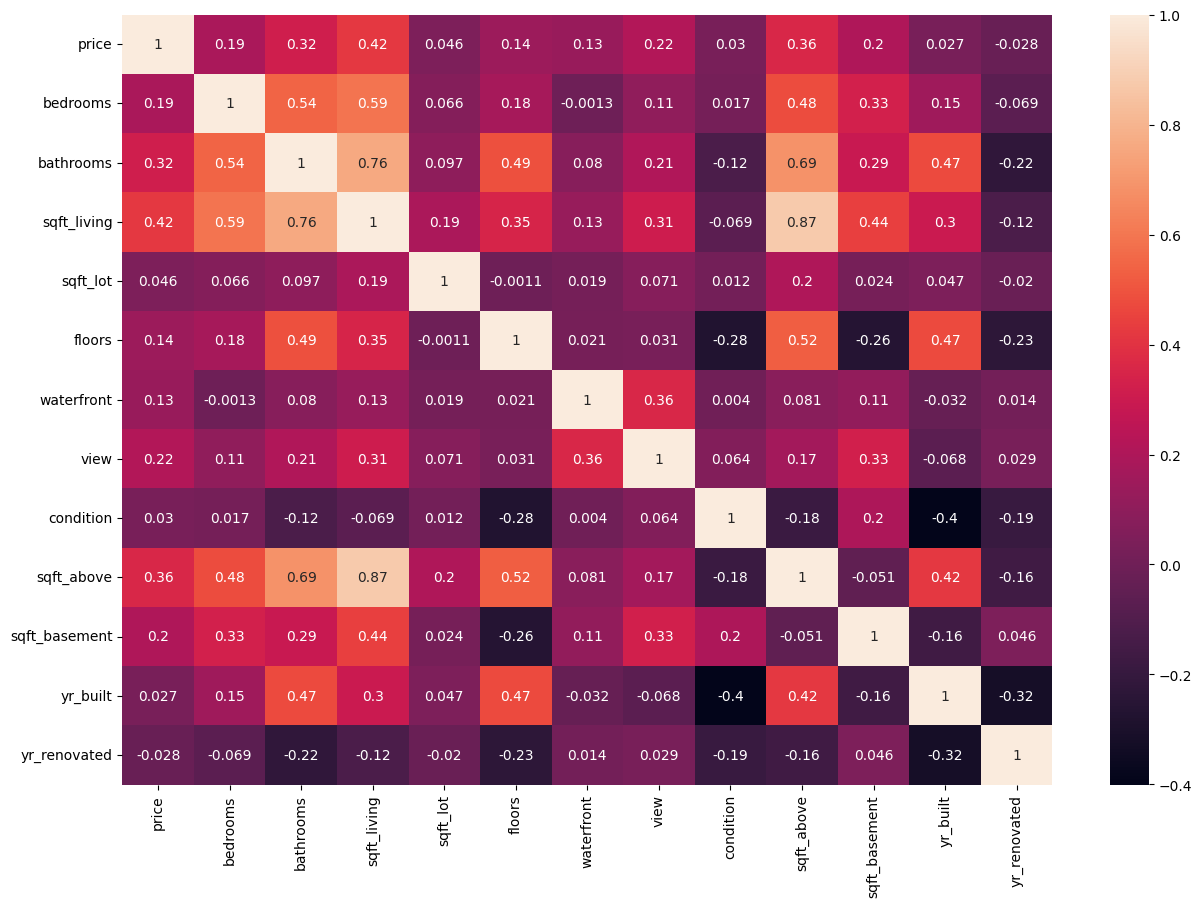

In [10]:
# matriz de corelação para valores numericos
base_n = base.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13]]
corr_matriz = base_n.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_matriz, annot=True)
plt.show()

In [11]:
base[base['sqft_living'] == 9640]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
2194,2014-06-17 00:00:00,4668000.0,5.0,6.75,9640,13068,1.0,1,4,3,4820,4820,1983,2009,5044 Butterworth Rd,Mercer Island,WA 98040,USA


In [12]:
base[base['price'] > 7000000]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
1826,2014-06-11 00:00:00,7062500.0,5.0,4.5,10040,37325,2.0,1,2,3,7680,2360,1940,2001,4442 95th Ave NE,Bellevue,WA 98004,USA
3886,2014-06-23 00:00:00,12899000.0,3.0,2.5,2190,11394,1.0,0,0,3,1550,640,1956,2001,5426 40th Ave W,Seattle,WA 98199,USA
3890,2014-07-03 00:00:00,26590000.0,3.0,2.0,1180,7793,1.0,0,0,4,1180,0,1992,0,12005 SE 219th Ct,Kent,WA 98031,USA


In [13]:
# visualizar o desbanlaceamento das classes de preço
import plotly.express as px

base.price.value_counts()
ax= px.histogram(base, x='price', nbins=100 ,width=800, height=500)
ax.update_layout(
    title='Distribuição do preço das casas',
    xaxis_title='Preço',
    yaxis_title='Quantidade de casas'
)
ax.show()

## 3.Preparação dos Dados:
* Tranformar dados categóricos;
* Selecionar melhores features;
* separar base de treino e teste;

## 4.Criação de modelo